# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        
        
      # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather[ 'clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | penon blanco
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | la'ie
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | chiredzi
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | jumla
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | kirensk
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | ilha de mocambique
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Se

Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | istgah-e rah ahan-e garmsar
Processing Record 41 of Set 4 | charlottetown
Processing Record 42 of Set 4 | bhabhua
Processing Record 43 of Set 4 | alo
Processing Record 44 of Set 4 | ciudad lazaro cardenas
Processing Record 45 of Set 4 | howard springs
Processing Record 46 of Set 4 | general conesa
Processing Record 47 of Set 4 | yakymivka
Processing Record 48 of Set 4 | chibougamau
Processing Record 49 of Set 4 | sydney mines
Processing Record 0 of Set 5 | ribeira grande
Processing Record 1 of Set 5 | maryborough
Processing Record 2 of Set 5 | kataragama
City not found. Skipping...
Processing Record 3 of Set 5 | badger
Processing Record 4 of Set 5 | kununurra
Processing Record 5 of Set 5 | alesund
Processing Record 6 of Set 5 | san jose del cabo
Processing Record 7 of Set 5 | carora
Processing Record 8 of Set 5 | ipora
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | kovdor
Processing Record

Processing Record 26 of Set 8 | rio grande
Processing Record 27 of Set 8 | revda
Processing Record 28 of Set 8 | mogadishu
Processing Record 29 of Set 8 | cabo san lucas
Processing Record 30 of Set 8 | lazaro cardenas
Processing Record 31 of Set 8 | queenstown
Processing Record 32 of Set 8 | newnan
Processing Record 33 of Set 8 | gore
Processing Record 34 of Set 8 | pandan
Processing Record 35 of Set 8 | neryungri
Processing Record 36 of Set 8 | kristiansund
Processing Record 37 of Set 8 | voss
Processing Record 38 of Set 8 | dakhla
Processing Record 39 of Set 8 | angaur state
Processing Record 40 of Set 8 | ishigaki
Processing Record 41 of Set 8 | udachny
Processing Record 42 of Set 8 | north battleford
Processing Record 43 of Set 8 | seaside
Processing Record 44 of Set 8 | happy valley-goose bay
Processing Record 45 of Set 8 | jayapura
Processing Record 46 of Set 8 | susuman
Processing Record 47 of Set 8 | riyadh
Processing Record 48 of Set 8 | axim
Processing Record 49 of Set 8 | mu

Processing Record 18 of Set 12 | gilgit
Processing Record 19 of Set 12 | kirsanov
Processing Record 20 of Set 12 | kharp
Processing Record 21 of Set 12 | cadillac
Processing Record 22 of Set 12 | opuwo
Processing Record 23 of Set 12 | ridgecrest
Processing Record 24 of Set 12 | guigang
Processing Record 25 of Set 12 | balta
Processing Record 26 of Set 12 | labrador city
Processing Record 27 of Set 12 | pathein
Processing Record 28 of Set 12 | uliastay
Processing Record 29 of Set 12 | toliara
Processing Record 30 of Set 12 | ghadamis
Processing Record 31 of Set 12 | yazd
Processing Record 32 of Set 12 | tabou
Processing Record 33 of Set 12 | isola di capo rizzuto
Processing Record 34 of Set 12 | newnham
Processing Record 35 of Set 12 | zangguy
City not found. Skipping...
Processing Record 36 of Set 12 | esteli
Processing Record 37 of Set 12 | templin
Processing Record 38 of Set 12 | alice springs
Processing Record 39 of Set 12 | camabatela
Processing Record 40 of Set 12 | nadym
Processi

# using one city 'faya' to find out the  latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date from json

In [4]:

faya='faya'
base_url= f'https://api.openweathermap.org/data/2.5/weather?q={faya}&appid={weather_api_key}'
city_weather =requests.get(base_url).json()
city_weather

{'coord': {'lon': 42.4509, 'lat': 18.3851},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 289.44,
  'feels_like': 288.51,
  'temp_min': 289.21,
  'temp_max': 289.44,
  'pressure': 1014,
  'humidity': 53,
  'sea_level': 1014,
  'grnd_level': 787},
 'visibility': 10000,
 'wind': {'speed': 3.4, 'deg': 113, 'gust': 5.57},
 'clouds': {'all': 22},
 'dt': 1698187090,
 'sys': {'type': 1,
  'id': 7396,
  'country': 'SA',
  'sunrise': 1698203204,
  'sunset': 1698244899},
 'timezone': 10800,
 'id': 110690,
 'name': 'Faya',
 'cod': 200}

In [5]:
print(city_data)

[{'City': 'edinburgh of the seven seas', 'Lat': -37.0676, 'Lng': -12.3116, 'Max Temp': 13.13, 'Humidity': 83, 'Cloudiness': 68, 'Wind Speed': 10.08, 'Country': 'SH', 'Date': 1698187004}, {'City': 'jamestown', 'Lat': 42.097, 'Lng': -79.2353, 'Max Temp': 21.8, 'Humidity': 30, 'Cloudiness': 0, 'Wind Speed': 3.6, 'Country': 'US', 'Date': 1698187004}, {'City': 'port mathurin', 'Lat': -19.6833, 'Lng': 63.4167, 'Max Temp': 24.53, 'Humidity': 80, 'Cloudiness': 17, 'Wind Speed': 6.83, 'Country': 'MU', 'Date': 1698187004}, {'City': 'puerto natales', 'Lat': -51.7236, 'Lng': -72.4875, 'Max Temp': 6.19, 'Humidity': 74, 'Cloudiness': 98, 'Wind Speed': 6.17, 'Country': 'CL', 'Date': 1698187004}, {'City': 'bilibino', 'Lat': 68.0546, 'Lng': 166.4372, 'Max Temp': -14.94, 'Humidity': 96, 'Cloudiness': 30, 'Wind Speed': 1.66, 'Country': 'RU', 'Date': 1698187004}, {'City': 'bengkulu', 'Lat': -3.8004, 'Lng': 102.2655, 'Max Temp': 23.08, 'Humidity': 93, 'Cloudiness': 96, 'Wind Speed': 1.05, 'Country': 'ID', 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,13.13,83,68,10.08,SH,1698187004
1,jamestown,42.0970,-79.2353,21.80,30,0,3.60,US,1698187004
2,port mathurin,-19.6833,63.4167,24.53,80,17,6.83,MU,1698187004
3,puerto natales,-51.7236,-72.4875,6.19,74,98,6.17,CL,1698187004
4,bilibino,68.0546,166.4372,-14.94,96,30,1.66,RU,1698187004


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.13,83,68,10.08,SH,1698187004
1,jamestown,42.0970,-79.2353,21.80,30,0,3.60,US,1698187004
2,port mathurin,-19.6833,63.4167,24.53,80,17,6.83,MU,1698187004
3,puerto natales,-51.7236,-72.4875,6.19,74,98,6.17,CL,1698187004
4,bilibino,68.0546,166.4372,-14.94,96,30,1.66,RU,1698187004


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

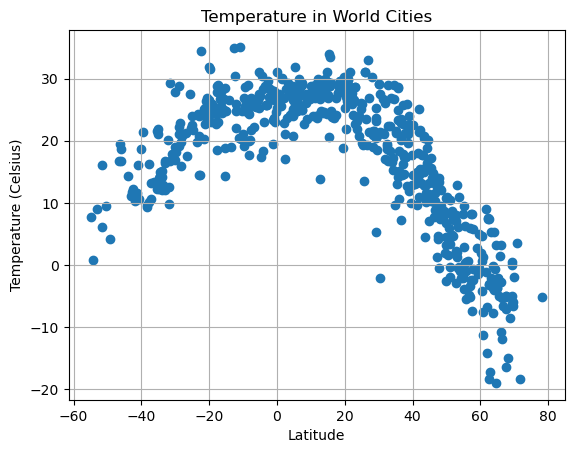

In [10]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

#the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

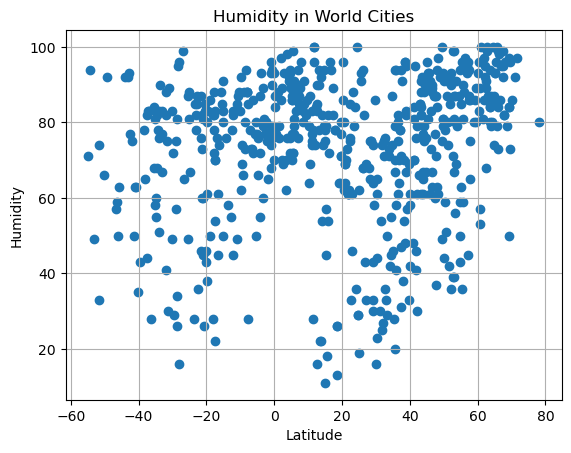

In [11]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

#other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

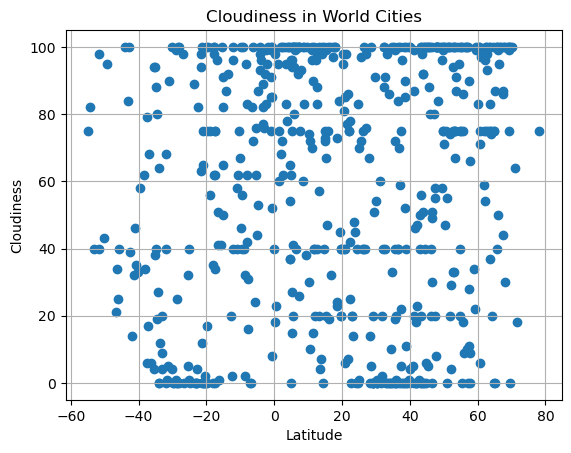

In [12]:
# Build the scatter plots for latitude vs. cloudiness


plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

#other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

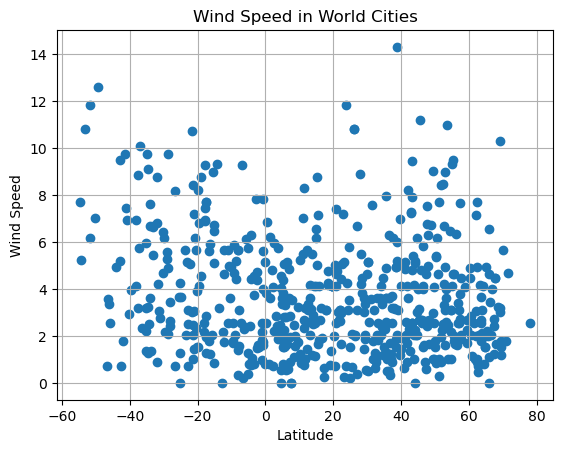

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values,y_values, marker="o")

#other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df =city_data_df [city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,21.80,30,0,3.60,US,1698187004
4,bilibino,68.0546,166.4372,-14.94,96,30,1.66,RU,1698187004
6,qaqortoq,60.7167,-46.0333,1.22,53,6,2.84,GL,1698187004
7,petropavlovsk-kamchatsky,53.0452,158.6483,1.36,81,75,4.92,RU,1698187005
8,penon blanco,24.7897,-104.0369,26.08,29,83,5.80,MX,1698187005


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df=city_data_df [city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.13,83,68,10.08,SH,1698187004
2,port mathurin,-19.6833,63.4167,24.53,80,17,6.83,MU,1698187004
3,puerto natales,-51.7236,-72.4875,6.19,74,98,6.17,CL,1698187004
5,bengkulu,-3.8004,102.2655,23.08,93,96,1.05,ID,1698187004
9,waitangi,-43.9535,-176.5597,14.34,92,100,4.92,NZ,1698187005


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7694289974897746


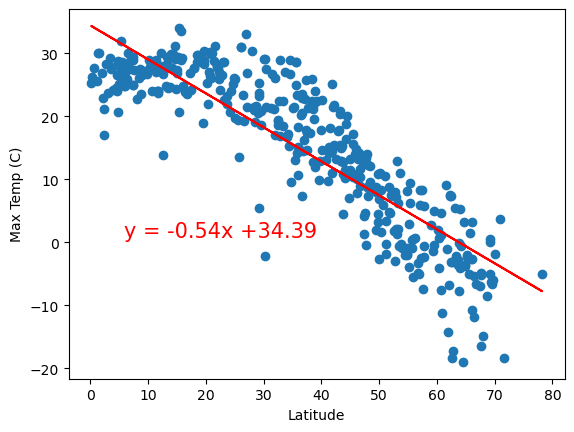

In [19]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df ['Lat']
y_values=northern_hemi_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Get regression values
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.5351766165722128


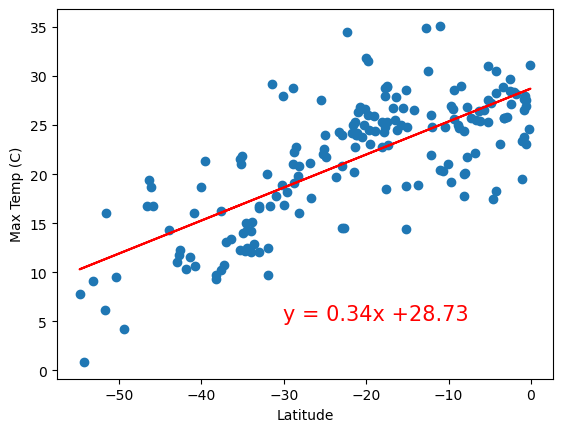

In [20]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df ['Lat']
y_values=southern_hemi_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Get regression values
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
#plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.annotate(line_eq, (x_values.max() - 30, y_values.max() - 30), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The positive slope of the regression line (given by slope) indicates a positive correlation between Latitude and Max Temperature in the Northern Hemisphere. As you move towards higher latitudes (closer to the North Pole), temperatures tend to decrease.
Whereas a r-value of 0.65 indicates a moderate positive correlation between Latitude and Max Temperature in the Southern Hemisphere. This suggests that as you move closer to the equator (lower latitudes), temperatures tend to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.015706536334066455


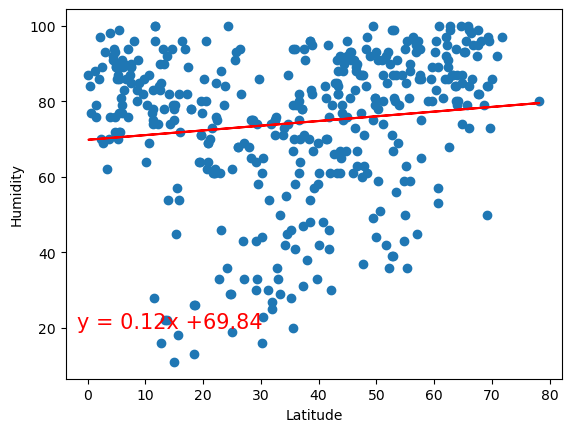

In [21]:
# Northern Hemisphere
x_values=northern_hemi_df ['Lat']
y_values=northern_hemi_df ['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Get regression values
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.annotate(line_eq, (x_values.max() - 80, y_values.max() - 80), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.03890330202603503


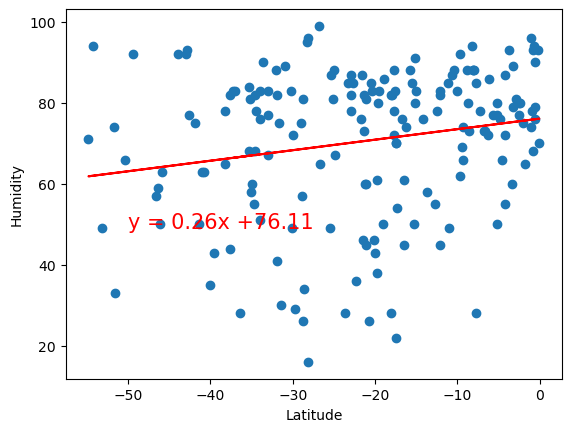

In [22]:
# Southern Hemisphere
x_values=southern_hemi_df ['Lat']
y_values=southern_hemi_df ['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Get regression values
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.annotate(line_eq, (x_values.max() - 50, y_values.max() - 50), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The r-squared values for our dependent variable, humidity vs. the latitude is close to 0, which shows that there is no relationship between the humidity vs the latitude of cities across the world. We can also see this clearly with the spread of the data, and the slope of the line, which is almost horizontal. This shows that there is almost no relationship between humidity and latitude. There is only a slight relationship between latitude and humidity in the northern hemisphere, but this is not enough to show a significant correlation between the two.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0010456312206458226


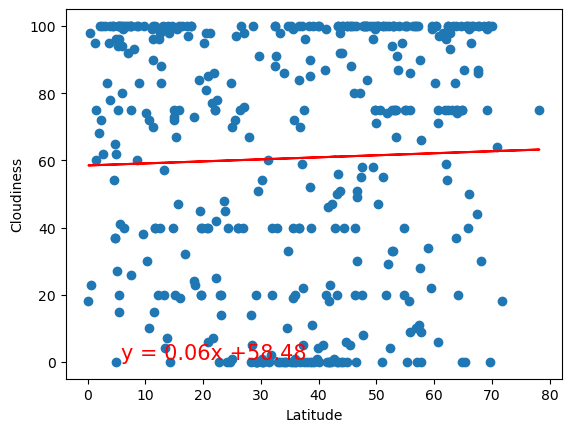

In [23]:
# Northern Hemisphere
x_values=northern_hemi_df ['Lat']
y_values=northern_hemi_df ['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Get regression values
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.06427640927555538


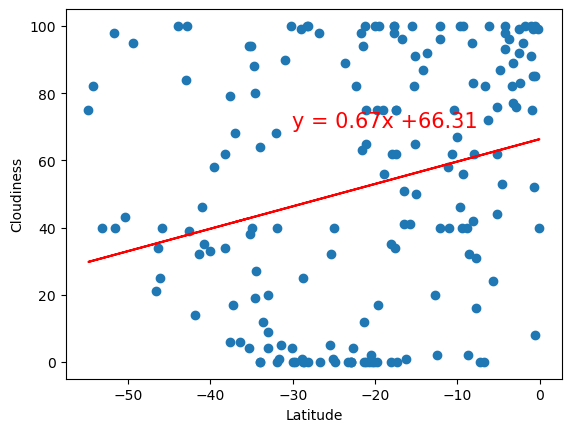

In [24]:
# Southern Hemisphere
x_values=southern_hemi_df ['Lat']
y_values=southern_hemi_df ['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#  regression values
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.annotate(line_eq, (x_values.max() - 30, y_values.max() - 30), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The r value of  0.001 means that there is very little correlation between latitude and cloudiness in the northern hemisphere. This suggests that latitude is not a strong determinator of cloudiness in the dataset.
In southern hemisphere scatter plot the majority of the data points are  spread out around the regression line, indicating a lack of strong linear association, whereas the an r-value of 0.064 suggests a very weak positive linear relationship between the cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0021715378885549964


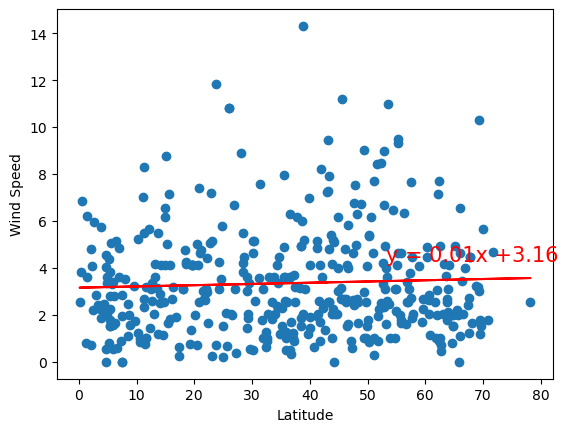

In [25]:
# Northern Hemisphere
x_values=northern_hemi_df ['Lat']
y_values=northern_hemi_df ['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# regression values
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.annotate(line_eq, (x_values.max() - 25, y_values.max() - 10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.09586670716632699


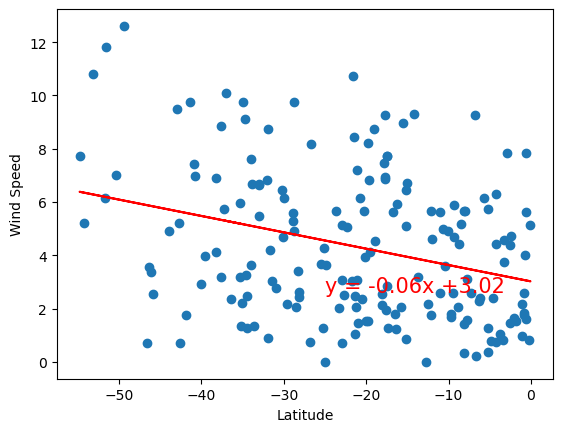

In [26]:
# Southern Hemisphere
x_values=southern_hemi_df ['Lat']
y_values=southern_hemi_df ['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Get regression values
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.annotate(line_eq, (x_values.max() - 25, y_values.max() - 10), fontsize=15, color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
An r-value of 0.0022 suggests a very weak linear relationship between latitude and wind speed in the Northern Hemisphere.
This indicates that changes in latitude are not a suitable predictor of changes in wind speed based on this data. The majority of the data points are scattered around the regression line, indicating a weak linear association.
With an r-value of approximately 0.0959, it shows a very weak positive linear relationship between latitude and wind speed in the Southern Hemisphere.
This implies that while there might be a slight tendency for wind speed to increase as latitude increases, the relationship is still not strong and an unreliable predictor of wind speed based on latitude alone. The majority of the data points are likely scattered around the regression line, indicating a weak linear association.
